# Guild calculations and barplots

# 0) Import needed data

### a) Silva OTUs

In [1]:
# mirroring from `SF_Guild_OTU bars etc...

In [2]:
# otu_V <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')

In [3]:
# Import OTU Table
SilvaOTUs <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')#, row.names=1)
row.names(SilvaOTUs) <-SilvaOTUs[,"OTU"]                                # Make OTU row names -- required!!!

In [4]:
#SilvaOTUs# [SilvaOTUs=='Archaea']

In [5]:
# SilvaOTUs["OTU"]  # row.names(SilvaOTUs) # 
otu_V <- SilvaOTUs

In [6]:
# Sort OTU table                                                                      
otu_V <-otu_V[order(otu_V$Consensus.lineage),]                                                         # sort by lineage

# Make new top level plotting var (should be in PRE-PROCESS ? )
otu_V$Taxonomy <- ifelse(otu_V$Phylum == "Proteobacteria", paste(otu_V$Class), paste(otu_V$Phylum))    # head(otu_V)
otu_V <- data.frame(otu_V)

In [41]:
#SilvaOTUs

In [7]:
# OTU_v <- read.table("SF_Sal_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          
# dim(OTU_v); head(OTU_v)
# OTU_v <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          
# dim(OTU_v); head(OTU_v)

In [45]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [49]:
# Silva OTUs, Delta Only (Use code from Get_16S_correlations.ipynb)            
OTU_samps <- data.frame('Sample'=colnames(otu_V))                                        # OTU_samps
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",] # Freshwater
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",] # Oligo
Meta_iTag_Delta <-rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta
Delta_sites <-Meta_iTag_Delta[,"Sample"]                                # Delta sites
tax_cols <- unlist(list("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Taxonomy"))
Delta_tax <- append(Delta_sites, tax_cols)
Delta_OTU <- otu_V %>%
    dplyr::select(names(Delta_tax))

# 1) Calculate aggregate guild abundances

#### ***DUE TO ISSUES WITH SILVA***

- **NOTE CHANGED MOB IIa to Family=='Beijerinckiaceae', "MOB_IIa"** 
- FROM Family=='Methylocystaceae', "MOB_IIa",  (as in Kneif 2015)

due to taxonomic reassingment in SILVA (elsewhere)???  These were in Family=='Methylocystaceae' before
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylosinus"
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylocystis"

- **Note ALSO had to change (no CH4ac) **
- from: Order=='Methanosarcinales'
- to:   Order=='Methanosarciniales'

In [8]:
# source("../modules/OTU_subsetting_modules_v.0.3_strip.R")   # ITAGGER VERSION # MOB IIa == Methylocystaceae
source("../modules/3_OTU_subsetting_modules_v.0.4_strip.r")  # SILVA VERSION    # MOB IIa == Beijerinckiaceae 

In [9]:
# use function for getting 16s Guilds
Guild_OTUs <- Get_16S_Guilds(otu_V)              # use Get_16S_Guilds to get guilds
# Guild_OTUs <- Get_16S_Guilds(SilvaOTUs)              # use Get_16S_Guilds to get guilds

In [11]:
# dim(Guild_OTUs); head(Guild_OTUs)

In [12]:
#Guild_OTUs[Guild_OTUs['Guild'] == 'CH4_H2']
#Guild_OTUs[Guild_OTUs['Guild'] == 'SRB']

In [11]:
#otu_V["OTU"] <- row.names(otu_V)
OTU_guilds <- merge(Guild_OTUs, otu_V)#, by="OTU")# all.y=TRUE)
head(OTU_guilds)# ; tail(OTU_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,otu_1019,SRB,0.0000,15.79866,0.000,0.00000,0.0000,0.00000,15.624023,0.000000,⋯,0.000,8.772315,0.00000,k__Bacteria;p__Desulfobacterota;c__Desulfobulbia;o__Desulfobulbales;f__Desulfobulbaceae;g__,Bacteria,Desulfobacterota,Desulfobulbia,Desulfobulbales,Desulfobulbaceae,DesulfobulbaceaeFA
2,otu_1025,MOB_II,0.0000,0.00000,0.000,0.00000,0.0000,0.00000,0.000000,0.000000,⋯,0.000,0.000000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
3,otu_103,SRB,354.0123,134.28863,0.000,62.06073,336.7394,114.87915,1859.258796,811.076994,⋯,0.000,0.000000,6.88056,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatirhabdium,Bacteria,Desulfobacterota,Desulfobacteria,Desulfobacterales,Desulfosarcinaceae,Desulfatirhabdium
4,otu_1034,SRB_syn,0.0000,0.00000,0.000,0.00000,0.0000,0.00000,0.000000,0.000000,⋯,0.000,0.000000,0.00000,k__Bacteria;p__Desulfobacterota;c__Syntrophobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__Syntrophobacter,Bacteria,Desulfobacterota,Syntrophobacteria,Syntrophobacterales,Syntrophobacteraceae,Syntrophobacter
5,otu_104,AOB,0.0000,23.69799,1771.479,31.03036,0.0000,53.61027,62.496094,0.000000,⋯,1687.408,3658.055178,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32
6,otu_1051,MOB_I,0.0000,0.00000,0.000,15.51518,0.0000,7.65861,7.812012,7.241759,⋯,0.000,61.406202,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera


In [12]:
levels(OTU_guilds[,2])

[1] "CH4_H2"  "CH4_ac"  "MOB_I"   "MOB_II"  "MOB_IIa" "AOA"     "AOB"    
 [8] "NOB"     "Anamx"   "SOxB"    "SRB_syn" "SRB"     "FeOB"    "FeRB"

In [13]:
write.table(OTU_guilds, "Silva_OTU_Guild_taxa_counts.txt", row.names=T, col.names=T, sep='\t')

In [14]:
# OTU_guilds['Guild'] == 'MOB_IIa'

In [15]:
#OTU_guilds[OTU_guilds['Guild'] == 'MOB_IIa',]

# 2) Plot guild abundances

In [16]:
# source("../modules/5_OTU_barplots_module_v0.3.7.R")
source("../modules/5_OTU_barplots_module_v0.4.R")       # working under R 4.0.2


In [17]:
# Get guilds color scheme
Guild_cols <- read.table("../data/colors/Guild_color_palette.txt", sep='\t') 
Guild_vars <-c("Guild", "G_index", "color")
Guild_cols <- Guild_cols[Guild_vars]
colnames(Guild_cols) <- c("Guild", "Index", "color")
Guild_cols['Index'] <- rev(Guild_cols[,'Index'])
# Guild_cols


In [18]:
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <-c('color','Location')                                                        # site_colors
site_colours <- (site_colors$color)                          

In [19]:
## REPLOT without SRB
#nope <- as.list("SRB, SRB_syn")
noSRB <- OTU_guilds[!OTU_guilds$Guild=="SRB",]
noSRBs <- noSRB[!noSRB$Guild=="SRB_syn",]
noSROBs <- noSRBs[!noSRBs$Guild=="SOxB",]
noFeRB <- noSROBs[!noSROBs$Guild=="FeRB",]
noFeROB <- noFeRB[!noFeRB$Guild=="FeOB",]
clean_guilds <- noFeROB[!noFeROB$Guild=="MeOB",]
#Guilds_noSRB <- OTU_guilds[!SRB]
#Guilds_noSRB
head(clean_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.000000,⋯,0.000,0.00000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
5,otu_104,AOB,0.00000,23.69799,1771.479,31.03036,0.00000,53.61027,62.496094,0.000000,⋯,1687.408,3658.05518,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32
6,otu_1051,MOB_I,0.00000,0.00000,0.000,15.51518,0.00000,7.65861,7.812012,7.241759,⋯,0.000,61.40620,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
12,otu_1067,NOB,377.10002,94.79197,0.000,124.12145,359.96284,137.85498,320.292482,173.802213,⋯,0.000,0.00000,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira
14,otu_1072,AOB,177.00613,110.59063,0.000,62.06073,81.28193,122.53776,70.308106,50.692312,⋯,0.000,26.31694,48.16392,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1
29,otu_1156,NOB,38.47959,86.89264,1771.479,155.15182,92.89364,176.14803,124.992188,94.142865,⋯,0.000,0.00000,13.76112,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL


In [20]:
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

In [21]:
#metaDB

In [22]:
Site_sort_G <- abund_loc_barplot(OTU_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)

Using Guild as id variables



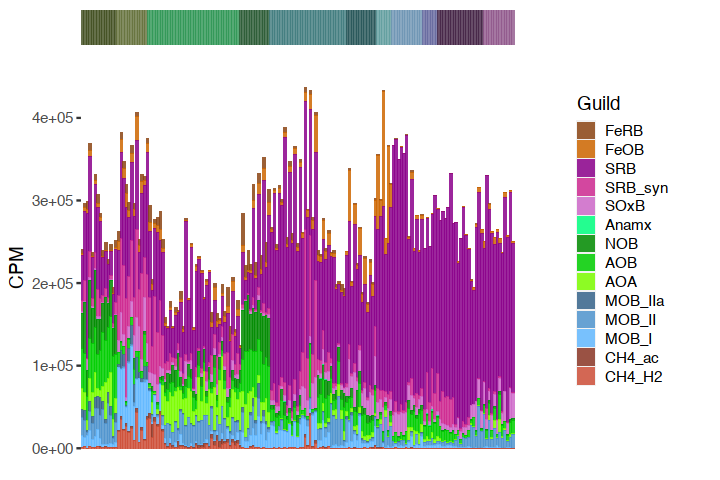

In [23]:
options(repr.plot.width=6, repr.plot.height=4) 
Site_sort_G

In [24]:
Site_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)

Using Guild as id variables



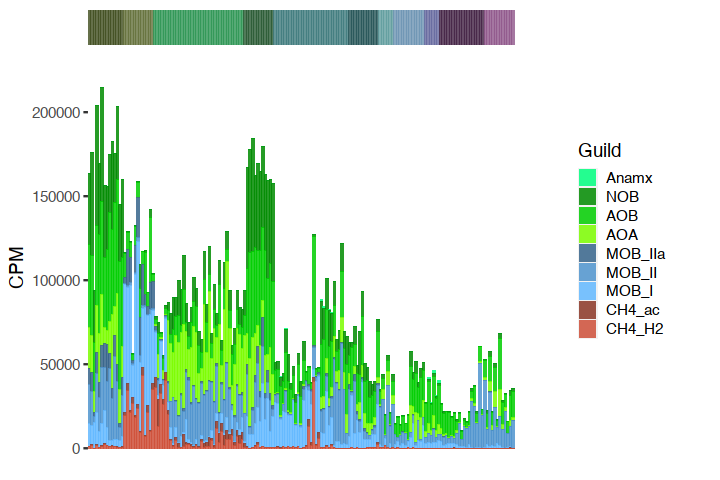

In [25]:
Site_sort_G

### sort by CH4

In [26]:
# metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

In [27]:
min(metaDB['CH4_ug_m2_h'])

[1] -0.3413328

In [28]:
# Get log CH4 data, note n + 1 here is 0 = min + 5%
metaDB['CH4_logn1'] =  log10(metaDB['CH4_ug_m2_h'] - 1.05*min(metaDB['CH4_ug_m2_h']))

### plot it

Using Guild as id variables



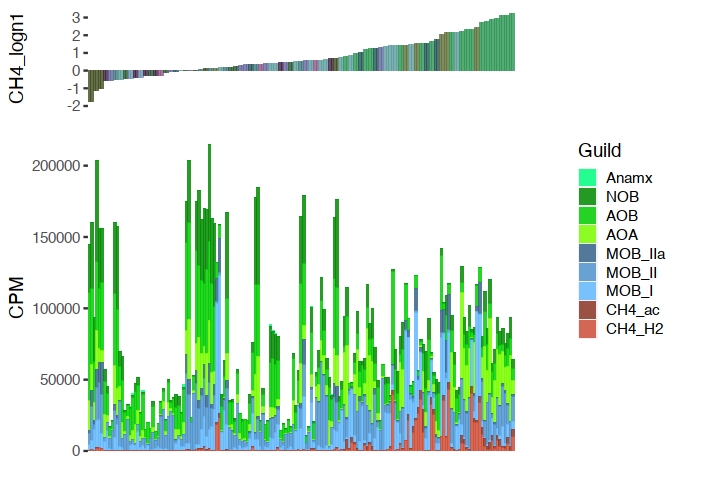

In [29]:
CH4_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols)
CH4_sort_G

Want to show as proportion, but not working!?  Similar works in tax comp. ipynb

In [30]:
# Want to show as proportion, but not working!?  Similar works in tax comp. ipynb
clean_guilds2 <- na.omit(clean_guilds)  # ah, some strange NAs, and row indexing in function
# dim(clean_guilds2)

Using Guild as id variables



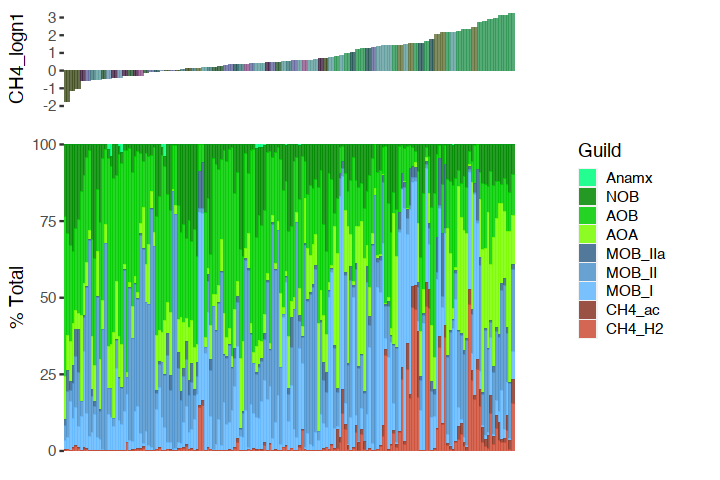

In [31]:
CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols, relab = '% Total')
# CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')

CH4_sort_G2

Using Guild as id variables



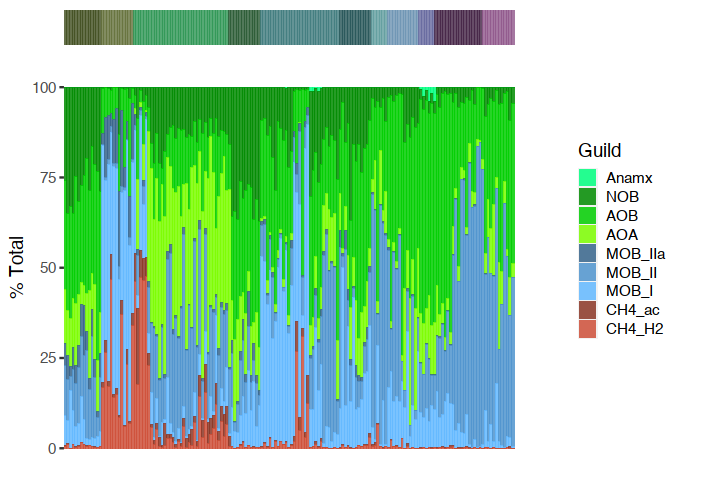

In [32]:
CH4_sort_G3 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')
CH4_sort_G3

# 3) Plot tradeoffs 
- Note 2 axis plot MUCH better in python, unless I am missing something in ggplot

In [33]:
# aggregate guilds
Guild_abund <- agg_by_cat(OTU_guilds, "Guild")
# Guild_abund

In [34]:
Guild_abundT <- data.frame(t(Guild_abund[,-1]))
Guild_abundT['Methanogen'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])
Guild_abundT['Methanotroph'] <- (Guild_abundT[,"MOB_I"] + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['Methanogen_Troph'] <- Guild_abundT['Methanogen']/Guild_abundT[,'Methanotroph']
#Guild_abundT['Methanogen_Troph'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])/Guild_abundT[,'Methanotroph']


#Guild_abundT['Methanogen_Troph'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])/(Guild_abundT[,"MOB_I"] + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['AOA_NOB'] <- (Guild_abundT[,"AOA"])/(Guild_abundT[,"NOB"])# + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['AO_NOB'] <- (Guild_abundT[,"AOA"]+Guild_abundT[,"AOB"])/(Guild_abundT[,"NOB"])# + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])

#Guild_abundT['Methanogen : Troph'] <-  with(Guild_abundT, ("CH4_H2" + "CH4_ac")/("MOB_I" + "MOB_II" + "MOB_IIa"))
# head(Guild_abundT)

In [35]:
# Write table for LASSO 
write.table(Guild_abundT, "Silva_OTU_Guild_abundT_counts.txt", row.names=T, col.names=T, sep='\t')

In [36]:
# Add sample, merge with site class RESTORED or NOT
Guild_abundT["Sample"] <- row.names(Guild_abundT)                      #head(Guild_abundT)

# Get sample names & Restoration & relevel 
restor <-c("Sample", "EWcoastGroup")
Samp_restor <- metaDB[restor]
levels(Samp_restor$EWcoastGroup) <-c("Historic", "Restored")
colnames(Samp_restor) <-c("Sample", "restor")
# Merge with Guilds
Guild_abundT_rest <- merge(Guild_abundT, Samp_restor)

head(Guild_abundT_rest)

,Sample,CH4_H2,CH4_ac,MOB_I,MOB_II,MOB_IIa,AOA,AOB,NOB,Anamx,⋯,SRB_syn,SRB,FeOB,FeRB,Methanogen,Methanotroph,Methanogen_Troph,AOA_NOB,AO_NOB,restor
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Browns_ThreeSqA_D1,400.6536,39.27977,15444.804,14211.419,3385.916,27810.074,56311.47,46837.19,0,⋯,2592.465,36883.70,3810.137,16348.24,439.9334,33042.14,0.013314313,0.5937605,1.7960416,SF_Ref
2,Browns_ThreeSqA_D2,1232.4360,97.48082,37098.414,21891.406,17664.917,9692.378,43546.07,48197.30,0,⋯,10332.967,112952.42,13229.539,11398.29,1329.9169,76654.74,0.017349441,0.2010979,1.1045940,SF_Ref
3,Browns_ThreeSqB_D1,163.4254,71.05452,16690.707,12633.494,3105.083,22311.119,62527.98,45403.84,0,⋯,2842.181,42959.56,6650.703,16960.71,234.4799,32429.28,0.007230500,0.4913928,1.8685446,SF_Ref
4,Browns_ThreeSqB_D2,503.7181,62.96476,28825.266,9520.272,7398.359,9255.820,45523.52,58538.34,0,⋯,11396.621,149119.44,14928.944,13184.82,566.6828,45743.90,0.012388162,0.1581155,0.9357857,SF_Ref
5,Browns_ThreeSqC_D1,216.2206,54.05515,9452.894,18912.546,3696.021,27737.049,50163.18,49913.17,0,⋯,3304.121,54007.85,6547.430,24297.79,270.2757,32061.46,0.008429926,0.5557060,1.5607148,SF_Ref
6,Browns_ThreeSqC_D2,263.3196,36.57216,18403.113,4235.057,2267.474,18659.118,55209.34,58449.63,0,⋯,7307.118,112152.20,15828.433,16259.98,299.8917,24905.64,0.012041116,0.3192341,1.2637968,SF_Ref


In [37]:
# Two axes ? 
#p <- ggplot(Guild_abundT_rest, aes(x=AOA_NOB))  
p <- ggplot(Guild_abundT_rest, aes(x=log10(AO_NOB)))  

#p + ggplot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanotroph)))# + 
p <-    p +    geom_point(aes(y=(Methanogen_Troph*25000),shape=restor), color="red") + scale_shape_manual(values=c(19, 2))  #+

p <- p + geom_point(aes(y=(Methanotroph),shape=restor), color="blue")  #+
p <- p + scale_y_continuous(sec.axis = sec_axis(~./25000, name = "Methanotroph"), limits = c(0, 60000))# +
#            coord_trans(x="log") 
#p <- p + scale_x_continuous(limits = c(0, 6), trans='log10') #+ scale_y_continuous(limits = c(0, 6000)) +
p <- p + scale_x_continuous(limits = c(0, 1)) + #scale_y_continuous(limits = c(0, 60000)) +
        theme(legend.title=element_blank())       + 
        theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"), 
              legend.title=element_blank()) #+

Warning message:
“Removed 50 rows containing missing values (geom_point).”
Warning message:
“Removed 55 rows containing missing values (geom_point).”


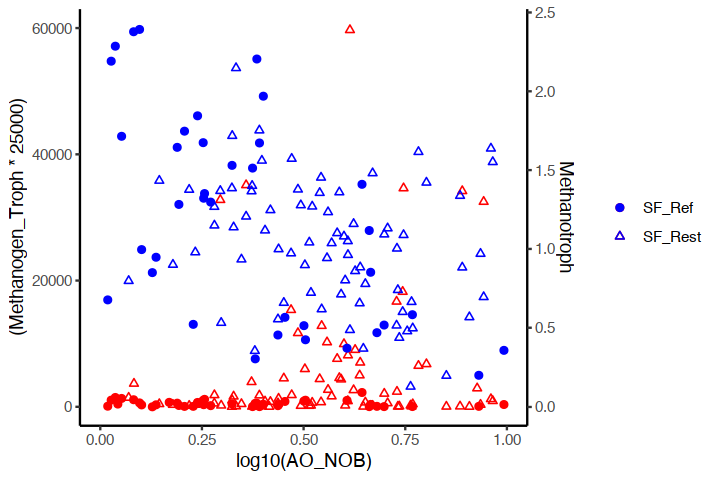

In [38]:
options(repr.plot.width=6, repr.plot.height=4)
p

## 4) Delta methanotrophs, methanogens

In [50]:
# Read pre-calculated CORRELATION table (Here, OTU level)
CH4corrRanksOTU_Delta <- read.table("../taxon_analysis/correlations/CH4corrRanks_Silva_Delta_OTU.txt", sep = '\t')

# CORRELATION FILTER RESULTS
CorrFilt_OTU_Delta <- OTU_corr_filt_OTU(Delta_OTU, CH4corrRanksOTU_Delta, "Genus", 0.6)
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 

#### get Delta sites subset info

In [66]:
# Prune metadata to only iTag samples
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))                                        # OTU_samps

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Separate Delta Sites (oligo and FW)
# levels(Meta_iTag$SALTgroup)
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",]
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",]

Meta_iTag_Delta <- rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta

Delta_sites <- Meta_iTag_Delta[,"Sample"]                                # Delta sites

# Subset OTU table by Delta sites
tax_cols <- c("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus")
Delta_tax <- c(Delta_sites, tax_cols)
guilds <- c('OTU', 'Guild')
Guild_delta_tax <- c(guilds, Delta_tax)
# Delta_OTU = otu_V[Delta_tax]

#### Subset clean guild data

In [67]:
# Delta_subset
head(clean_guilds2)
Delta_guilds <- clean_guilds2 %>%
    dplyr::select(all_of(Guild_delta_tax))

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.000000,⋯,0.000,0.00000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
5,otu_104,AOB,0.00000,23.69799,1771.479,31.03036,0.00000,53.61027,62.496094,0.000000,⋯,1687.408,3658.05518,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32
6,otu_1051,MOB_I,0.00000,0.00000,0.000,15.51518,0.00000,7.65861,7.812012,7.241759,⋯,0.000,61.40620,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
12,otu_1067,NOB,377.10002,94.79197,0.000,124.12145,359.96284,137.85498,320.292482,173.802213,⋯,0.000,0.00000,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira
14,otu_1072,AOB,177.00613,110.59063,0.000,62.06073,81.28193,122.53776,70.308106,50.692312,⋯,0.000,26.31694,48.16392,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1
29,otu_1156,NOB,38.47959,86.89264,1771.479,155.15182,92.89364,176.14803,124.992188,94.142865,⋯,0.000,0.00000,13.76112,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL


In [68]:
head(Delta_guilds)

,OTU,Guild,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,Sandmound_ThreeSqB_D1,Sandmound_ThreeSqB_D2,Sandmound_ThreeSqC_D1,Sandmound_ThreeSqC_D2,⋯,MayberrySE_TuleB_D2,MayberrySE_TuleC_D1,MayberrySE_TuleC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,932.003523,964.05331,462.37352,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
5,otu_104,AOB,62.496094,0.000000,0.000000,0.00000,101.00925,0.00000,0.00000,19.20289,⋯,164.805501,124.96987,40.20639,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32
6,otu_1051,MOB_I,7.812012,7.241759,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.000000,8.92642,0.00000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
12,otu_1067,NOB,320.292482,173.802213,754.214295,325.23544,1069.01457,1018.77950,207.14043,288.04332,⋯,11.365897,8.92642,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira
14,otu_1072,AOB,70.308106,50.692312,97.949908,240.39141,218.85338,237.71522,177.54894,96.01444,⋯,897.905834,473.10023,495.87884,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1
29,otu_1156,NOB,124.992188,94.142865,9.794991,28.28134,16.83488,22.63954,29.59149,86.41300,⋯,5.682948,196.38123,268.04262,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL


In [69]:
# Methanotroph subset
# levels(Delta_guilds$Guild) 
methanotrophs <- c('MOB_I','MOB_II','MOB_IIa')

Delta_mtrophs <- Delta_guilds[Delta_guilds$Guild %in% methanotrophs,]

In [70]:
head(Delta_mtrophs)

,OTU,Guild,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,Sandmound_ThreeSqB_D1,Sandmound_ThreeSqB_D2,Sandmound_ThreeSqC_D1,Sandmound_ThreeSqC_D2,⋯,MayberrySE_TuleB_D2,MayberrySE_TuleC_D1,MayberrySE_TuleC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,932.003523,964.05331,462.3735,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
6,otu_1051,MOB_I,7.812012,7.241759,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,0.000000,8.92642,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
41,otu_1212,MOB_I,656.208987,470.714327,156.719853,325.2354,286.192877,396.19203,155.35532,547.282311,⋯,5.682948,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylococcaceae;g__Methylocaldum,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylocaldum
53,otu_1261,MOB_I,7.812012,0.000000,9.794991,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
55,otu_1274,MOB_I,445.284670,94.142865,58.769945,0.0000,185.183626,90.55818,51.78511,76.811552,⋯,0.000000,17.85284,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__Crenothrix,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,Crenothrix
108,otu_1629,MOB_I,0.000000,0.000000,0.000000,0.0000,8.417438,0.00000,0.00000,9.601444,⋯,17.048845,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__IheB2-23,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,IheB2-23


In [71]:
# Delta_guilds$Guild

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



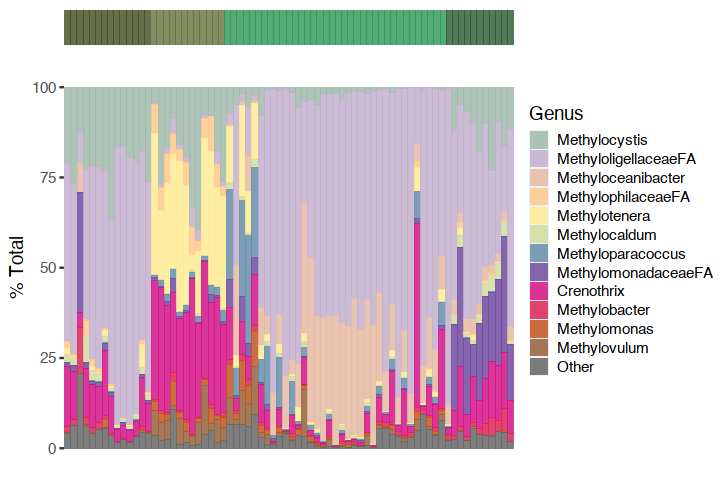

In [72]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = '% Total')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



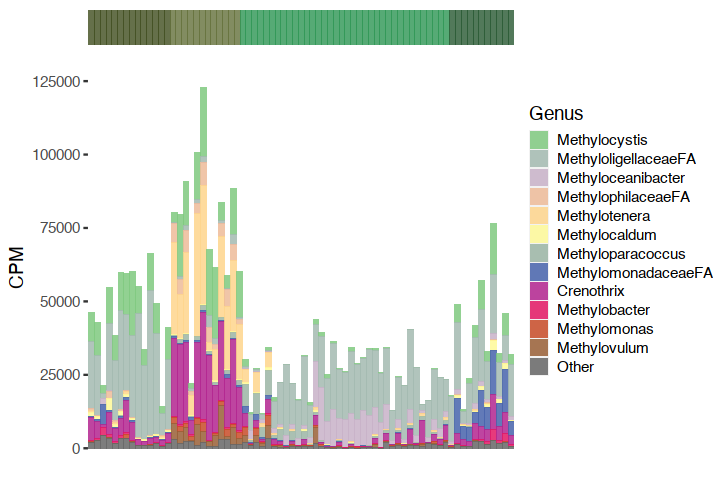

In [73]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



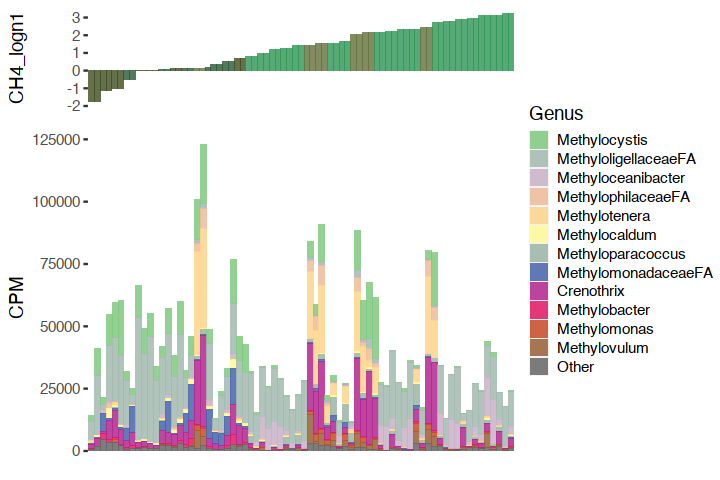

In [74]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

#### Correlated genera

In [75]:
corr_Delta_mtrophs <- Delta_mtrophs[Delta_mtrophs$OTU %in% corrOTUs,]

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



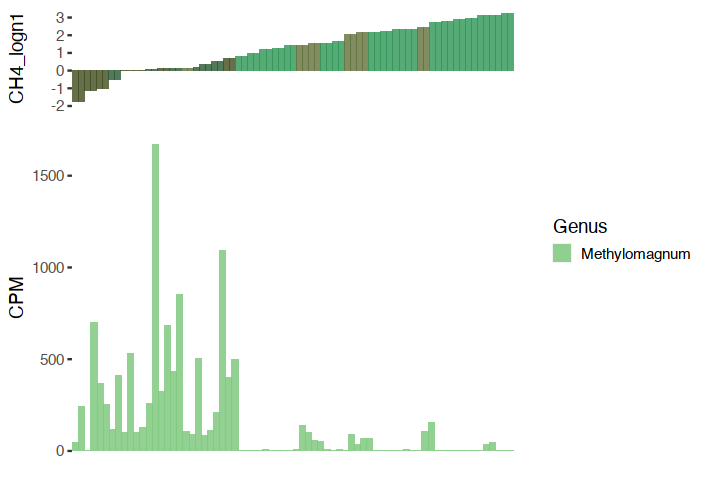

In [76]:
abund_loc_barplot(corr_Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

In [107]:
# abund_loc_barplot(Delta_mtrophs, "Guild", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

### b) Methanogens

In [77]:
levels(Delta_guilds$Guild)

[1] "CH4_H2"  "CH4_ac"  "MOB_I"   "MOB_II"  "MOB_IIa" "AOA"     "AOB"    
 [8] "NOB"     "Anamx"   "SOxB"    "SRB_syn" "SRB"     "FeOB"    "FeRB"

In [78]:
# Methanogen subset
# levels(Delta_guilds$Guild) 
methanogens <- c('CH4_H2','CH4_ac')

Delta_mgens <- Delta_guilds[Delta_guilds$Guild %in% methanogens,]

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



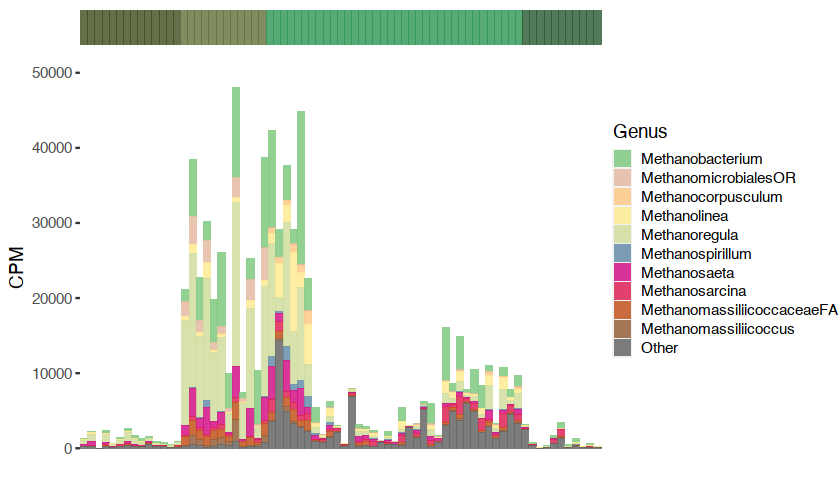

In [82]:
options(repr.plot.width=7, repr.plot.height=4)

abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = 'CPM')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



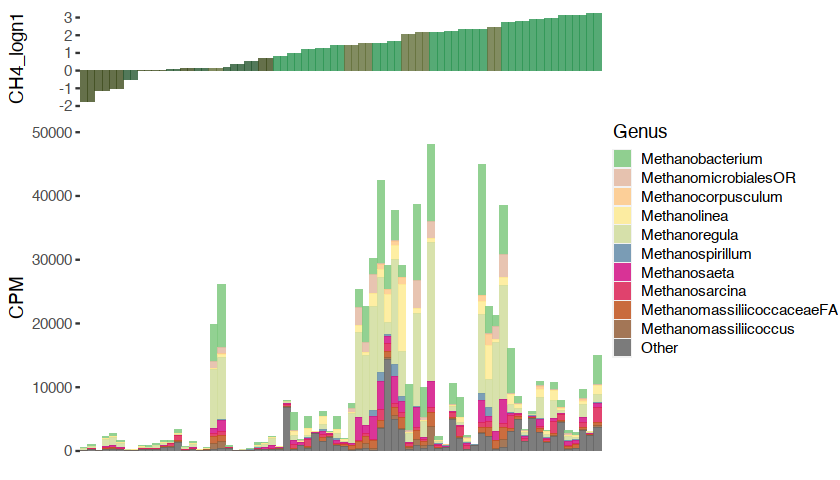

In [80]:
abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

#### Correlated genera

In [114]:
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 
#corrOTUs

In [125]:
corr_Delta_mgens <- Delta_mgens[Delta_mgens$OTU %in% corrOTUs,]

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



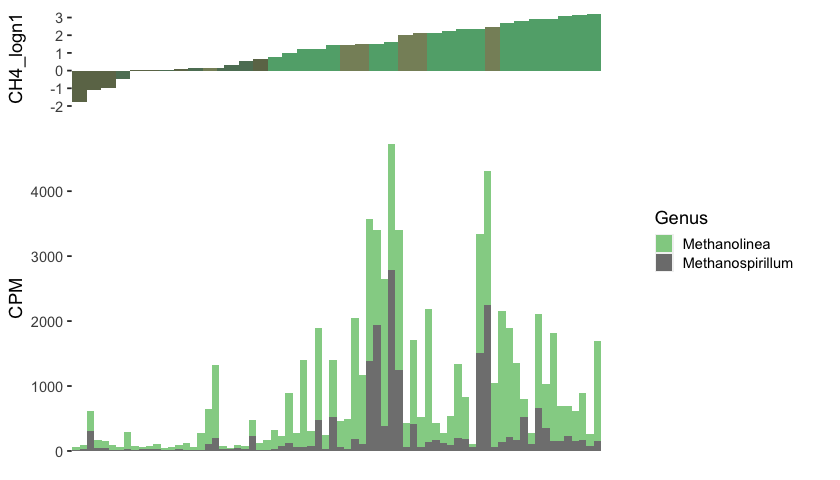

In [128]:
abund_loc_barplot(corr_Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')